# Empirical/computational test of the central limit theorem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

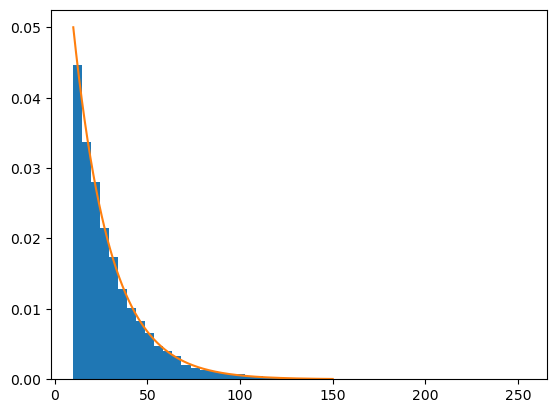

In [57]:
# here we choose the probability distribution function to be exponential.
# we take N_draws samples from this distribution and make sure that their normalized histogram really follows that dist.

N_draws = 10000

loc = 10
scale = 20


dist = expon(loc=loc, scale=scale)
samples = dist.rvs(N_draws)


plt.hist(samples, bins=50, density=True);

# Analytic PDF
x = np.linspace(loc, 150, 1000)
y = np.exp(-(x - loc) / scale) / scale  # this is the pdf above
plt.plot(x, y)



In [3]:
#theoretical mean and std
dist.mean(), dist.std()

(30.0, 20.0)

19.811189466715682


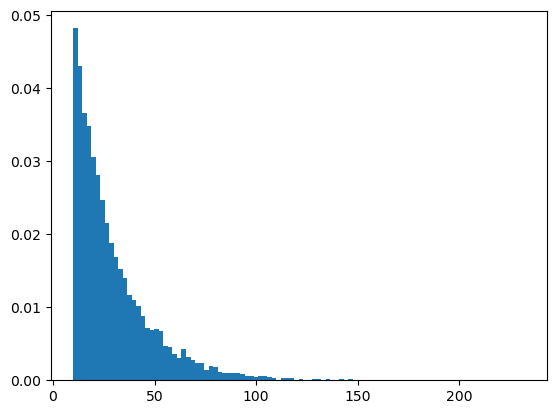

In [54]:
# now, let's draw N_draws from dist distribution, compute the mean of N_draws, and repeat that N_repeats times. 
# plot a histogram of N_draws values obtained this way.

N_repeats = 10000
N_bins = 100
mus = np.zeros(N_repeats)


# make mus to be averages of N_draws from the distribution:
N_draws = 1
for i in np.arange(N_repeats):
    mus [i] = dist.rvs(N_draws).mean()
plt.hist(mus, bins=N_bins, density=True); 
print(mus.std())



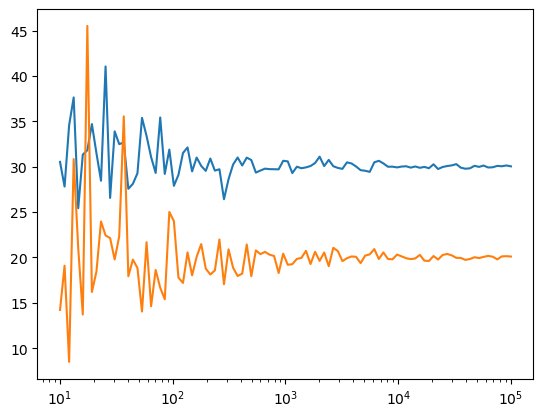

In [56]:
# now let's put it all together, and do the experiment of drawing N_draws times, for many values of N_draws
# plot how std and mu changes as N_draws grows.

N_draws = np.logspace(1, 5, 100)
mus = np.zeros(len(N_draws));
stds = np.zeros(len(N_draws));

for i in np.arange(len(N_draws)):
    mus[i] = dist.rvs(int(N_draws[i])).mean();
    stds[i] = dist.rvs(int(N_draws[i])).std();

plt.semilogx(N_draws,mus)
plt.semilogx(N_draws,stds)